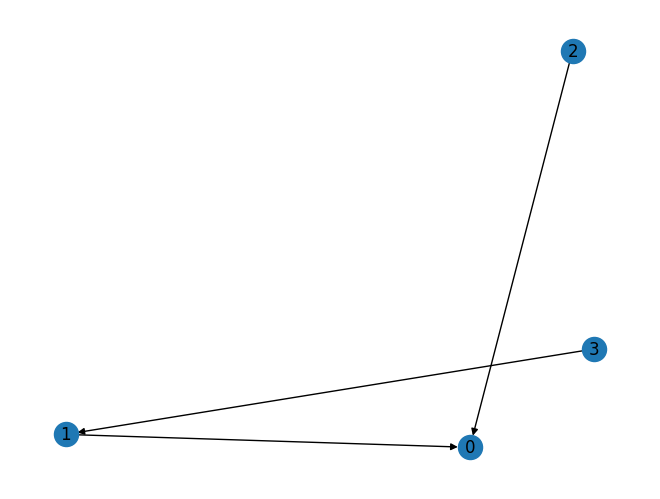

{(0, 3, 1, 1): 1.0}
1.00000000000000e+30
1.00000000000000e+30
{(0, 2, 1, 0): 1.0}
1.0e+30*x30 + 10.94*x31 + 1.0e+30*x32 + 9.93*x33 + 1.0e+30
1.0e+30*x30 + 10.94*x31 + 1.0e+30*x32 + 9.93*x33 + 1.0e+30


In [7]:
from qrisp import *
from qrisp.quantum_backtracking import OHQInt
from zander_preparation_parametrized import *

import numpy as np
import networkx as nx

# Define the problem instance 
cost_coeff={
    1: {(0,1): 1.64, (0,2): 1.05,(1,2): 0.59, (0,3): 1.09, (1,3): 0.37, (2,3): 0.93},   
    2: {(0,1): 5.56, (0,2): 3.54,(1,2): 1.98, (0,3): 3.68, (1,3): 1.24, (2,3): 3.15},
    3: {(0,1): 8.06, (0,2): 5.14,(1,2): 2.88, (0,3): 5.35, (1,3): 1.8, (2,3): 4.58 },
    }
tot_coeff = {}
for k,v in cost_coeff.items():
  tot_coeff[k]={}
  for rs,c in v.items():
    i,j=rs[0],rs[1]
    tot_coeff[k][(i,j)]=c
    tot_coeff[k][(j,i)]=c
    #avoid movements from a destination to the same
    tot_coeff[k][(i,i)]=10**30  #cost suggested by the challenge text
    tot_coeff[k][(j,j)]=10**30


Phi = [(1,0),(2,0),(3,1)]
PBS_graph = nx.DiGraph()
PBS_graph.add_edges_from(Phi)
nx.draw(PBS_graph, with_labels = True)
plt.show()

M = PBS_graph.number_of_nodes() # Number of parts
# num of sites
N = 4
qtype = OHQInt(N)
q_array = QuantumArray(qtype = qtype, shape = (M))

from classical_cost_func import cost_function
cl_cost =cost_function(tot_coeff,M,N,PBS_graph)


results = {(0, 3, 1, 1):1.0}
print(results)
print(cl_cost(results))


results = {(0, 2, 1, 0):1.0}
print(results)
print(cl_cost(results))


1.0e+30*x30 + 9.86*x31 + 9.72*x32 + 1.0e+30*x33 + 1.0e+30